 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_data = Path('Resources\whale_returns.csv')
whale_returns = pd.read_csv(whale_data, index_col='Date', infer_datetime_format=True, parse_dates=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns_clean = whale_returns.dropna().copy()


In [5]:
whale_returns_clean.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Reading algorithmic returns
algo_path = Path('Resources\\algo_returns.csv')
algo_returns = pd.read_csv(algo_path, index_col='Date', infer_datetime_format=True, parse_dates=True)

algo_returns.head(10)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
2014-06-04,-0.001838,NaN
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668


In [7]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algo_returns_clean = algo_returns.dropna().copy()

In [9]:
algo_returns_clean.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [10]:
# Reading S&P 500 Closing Prices
spy_path = Path('Resources\\sp500_history.csv')
spy_df = pd.read_csv(spy_path, index_col='Date', infer_datetime_format=True, parse_dates=True)
spy_df = spy_df.sort_index()
spy_df.head(-5)

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93
...,...
2019-04-09,$2878.20
2019-04-10,$2888.21
2019-04-11,$2888.32


In [11]:
# Check Data Types
print(spy_df.dtypes)

Close    object
dtype: object


In [12]:
# Fix Data Types 
    # Access the data column of 'Close' and change the corresponding data values to floats
spy_df["Close"] = spy_df["Close"].str.replace(r"$", "", regex=True)
spy_df["Close"] = pd.to_numeric(spy_df["Close"])
spy_df.head()


,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [13]:
spy_df.dtypes

Close    float64
dtype: object

In [14]:
# Calculate Daily Returns
spy_returns = spy_df.pct_change()

spy_returns

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [15]:
# Drop nulls
spy_returns_clean = spy_returns.dropna().copy()

In [16]:
# Rename `Close` Column to be specific to this portfolio.
spy_returns_clean.columns = ['SPY Daily Returns']

In [17]:
spy_returns_clean.head()

,SPY Daily Returns
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


<AxesSubplot:xlabel='Date'>

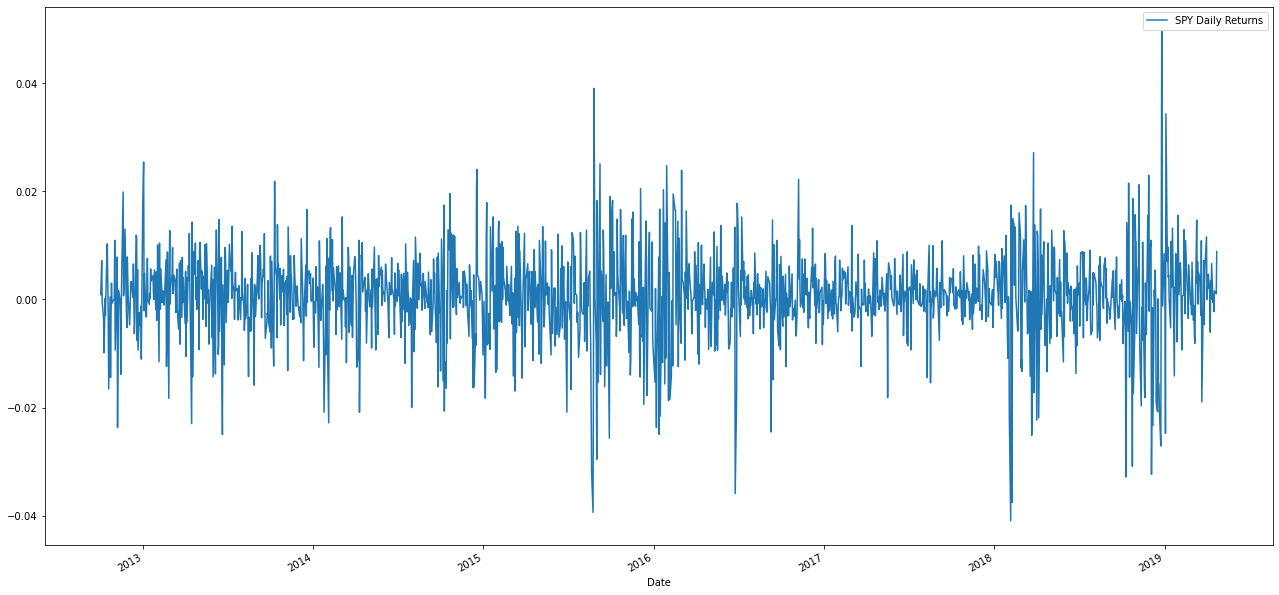

In [18]:
spy_returns_clean.plot(figsize=(22,11))

## Combine Whale, Algorithmic, and S&P 500 Returns

In [19]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns = pd.concat([whale_returns_clean, algo_returns_clean, spy_returns_clean], axis=1, join='inner')

In [20]:
combined_returns.head(10)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SPY Daily Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,-0.016961
2015-03-11,0.004012,0.005163,0.003312,-0.001147,0.002994,0.000605,-0.001918
2015-03-12,0.008265,0.010272,0.013117,0.010801,-0.002935,0.011667,0.012601
2015-03-13,-0.002497,-0.001428,-0.003697,-0.008142,-0.005423,-0.005062,-0.006075


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

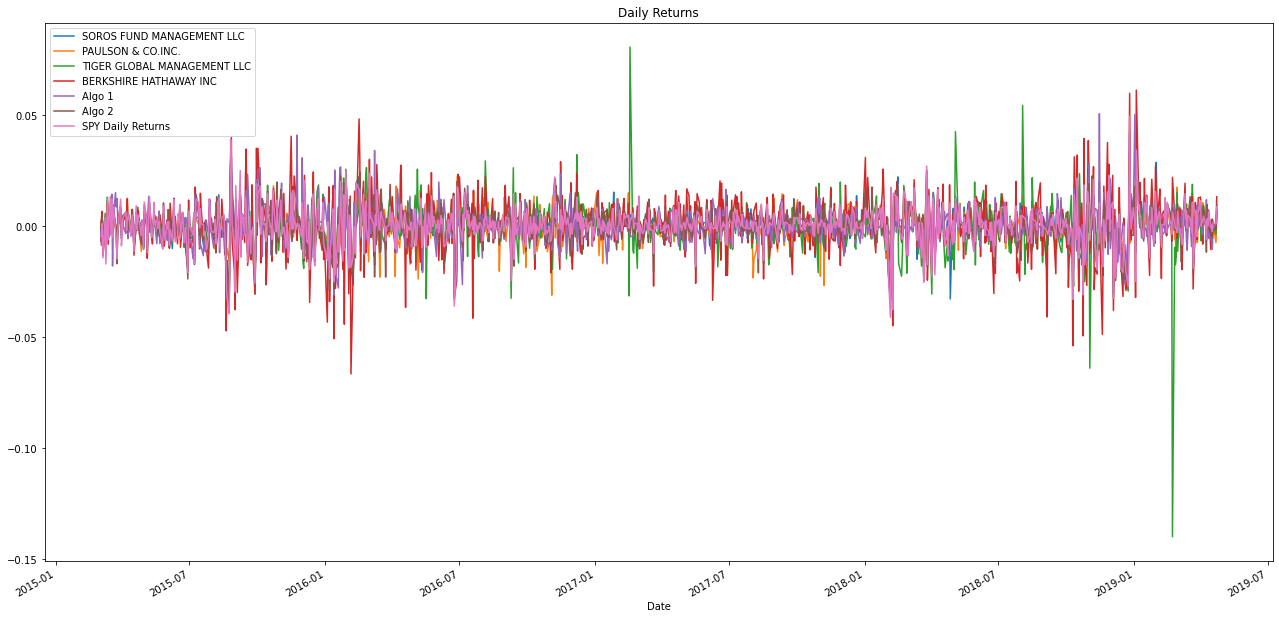

In [21]:
# Plot daily returns of all portfolios
combined_returns.plot(figsize=(22,11), title="Daily Returns")

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

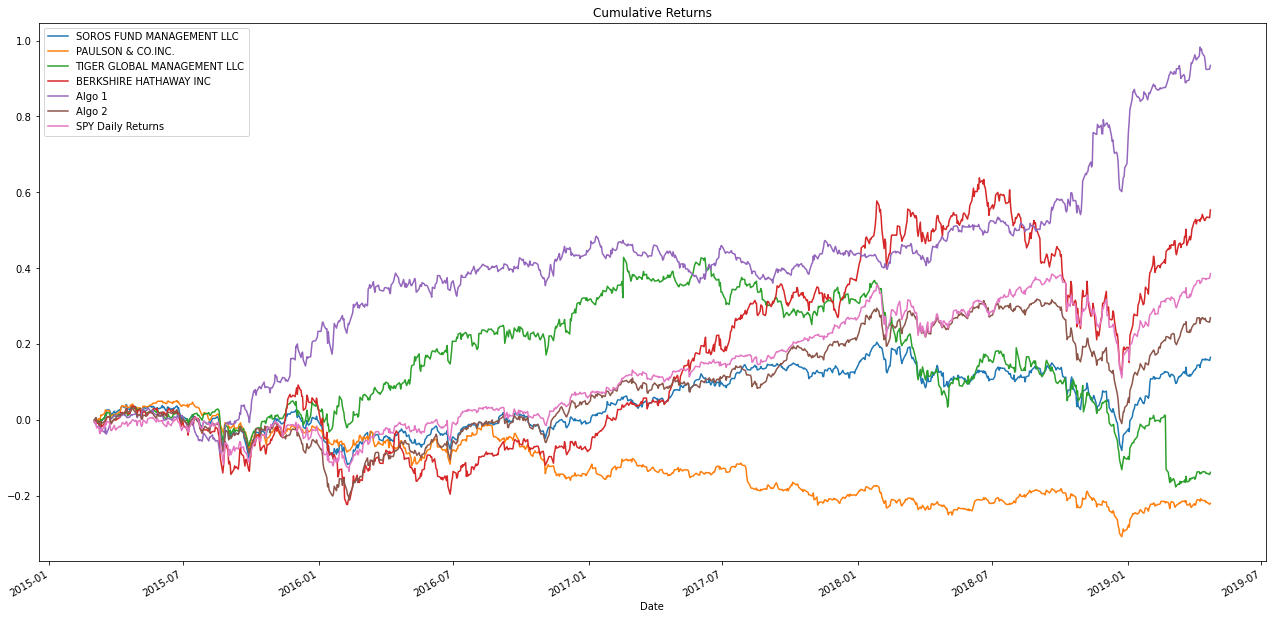

In [22]:
# Calculate cumulative returns of all portfolios
cum_returns = (1 + combined_returns).cumprod() - 1
# Plot cumulative returns
cum_returns.plot(figsize=(22,11), title='Cumulative Returns')

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


In [23]:
combined_returns.head(10)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SPY Daily Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,-0.016961
2015-03-11,0.004012,0.005163,0.003312,-0.001147,0.002994,0.000605,-0.001918
2015-03-12,0.008265,0.010272,0.013117,0.010801,-0.002935,0.011667,0.012601
2015-03-13,-0.002497,-0.001428,-0.003697,-0.008142,-0.005423,-0.005062,-0.006075


In [24]:
combined_returns.describe()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SPY Daily Returns
count,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000
mean,0.000177,-0.000214,-0.000083,0.000506,0.000662,0.000263,0.000349
std,0.007895,0.007023,0.010894,0.012919,0.007620,0.008342,0.008554
min,-0.032711,-0.032099,-0.139820,-0.066505,-0.030951,-0.036937,-0.040979
25%,-0.003638,-0.004042,-0.004790,-0.005634,-0.003252,-0.003794,-0.002881
50%,0.000518,0.000000,0.000320,0.000735,0.000069,0.000703,0.000419
75%,0.004328,0.003626,0.005285,0.007619,0.003908,0.005253,0.004471
max,0.042977,0.029338,0.080705,0.061341,0.050735,0.030822,0.049594


In [25]:
combined_returns.to_excel('Combined Portfolio Returns.xlsx', sheet_name='Combined Returns')

<AxesSubplot:>

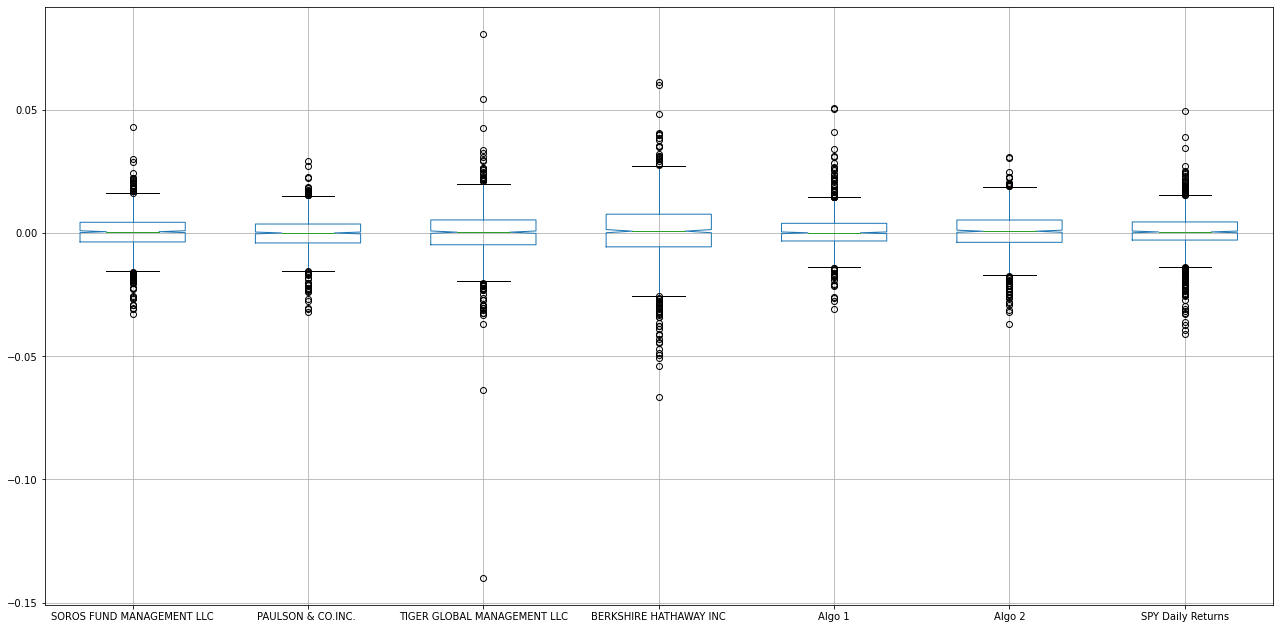

In [26]:
combined_returns.boxplot(figsize=(22,11), notch=True, widths=.6, autorange=True)

<AxesSubplot:title={'center':'Combined Return - Risks'}>

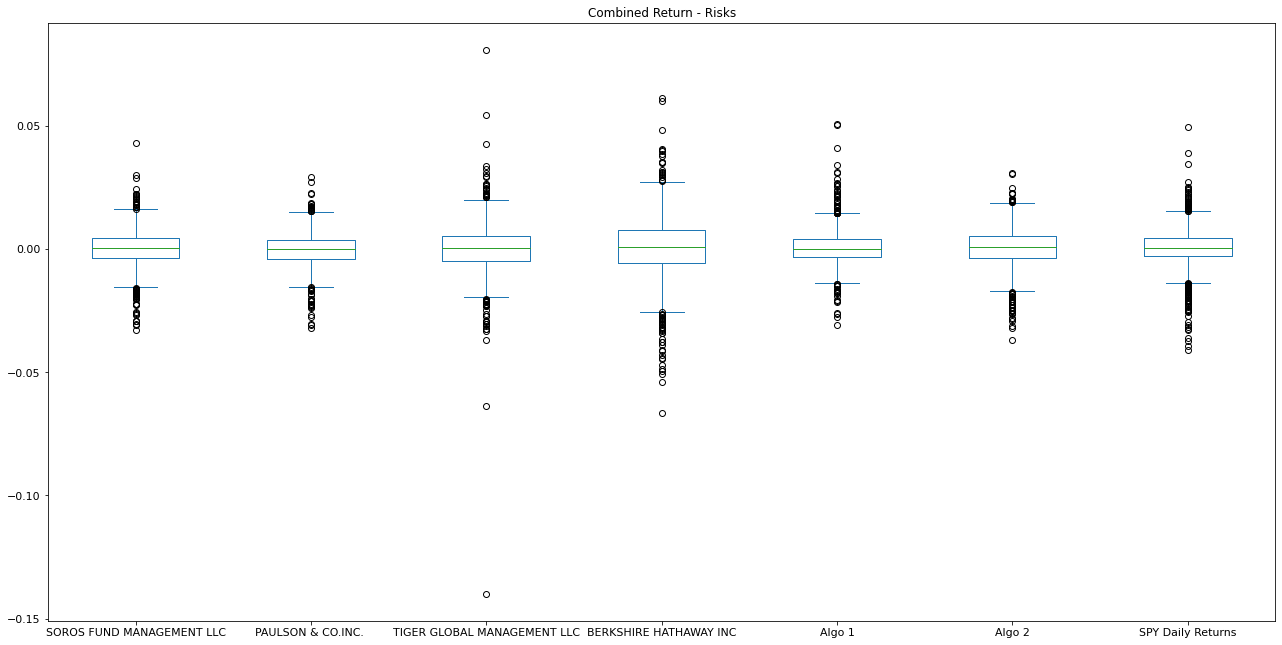

In [27]:
# Box plot to visually show risk
combined_returns.plot.box(figsize=(22,11), title='Combined Return - Risks', fontsize=11)

### Calculate Standard Deviations

In [28]:
# Calculate the daily standard deviations of all portfolios
combined_returns_std = combined_returns.std()
combined_returns_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
SPY Daily Returns              0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [29]:
SPY = combined_returns_std['SPY Daily Returns']

In [30]:
risk_list = list(combined_returns_std.loc[combined_returns_std > SPY].index)

In [31]:
risk_list

['TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC']

In [32]:
combined_returns_std.loc[risk_list]

TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

Based on the volatility score of each stock, Tiger Global Management and Berkshire Hathaway have been identified as having higher volatility than S&P500.

In [33]:
# Calculate  the daily standard deviation of S&P 500
spy_returns_volatility = spy_returns_clean.std()

# Determine which portfolios are riskier than the S&P 500
  # Coefficient of Variation is the comparison of volatility of different data sets.
  # Coefficient of Variation = Standard Deviation / Average
  
# Calculate the means of all portfolios
combined_returns_avg = combined_returns.mean()
combined_returns_avg


SOROS FUND MANAGEMENT LLC      0.000177
PAULSON & CO.INC.             -0.000214
TIGER GLOBAL MANAGEMENT LLC   -0.000083
BERKSHIRE HATHAWAY INC         0.000506
Algo 1                         0.000662
Algo 2                         0.000263
SPY Daily Returns              0.000349
dtype: float64

In [34]:
# Calculate the coefficient of variation for all portfolios
cov_combined_returns = combined_returns_std / combined_returns_avg

cov_combined_returns.abs() # Taking absolute value of all calculations to round out the numbers of positive and negative returns.

SOROS FUND MANAGEMENT LLC       44.539160
PAULSON & CO.INC.               32.827743
TIGER GLOBAL MANAGEMENT LLC    131.129672
BERKSHIRE HATHAWAY INC          25.529510
Algo 1                          11.514543
Algo 2                          31.662661
SPY Daily Returns               24.487590
dtype: float64

However, to properly compare the true volatilities of different portfolios with vastly different means, the **coefficient of variation** (COV) is calculated to truly compare the portfolio apple to apple. [Reference](https://seekingalpha.com/article/4079870-coefficient-of-variation-better-metric-to-compare-volatility)
<br><br>
After calculating the **coefficient of variation** for all portfolios, the only portfolio that is less risky than S&P500 (COV 24.487590) is Algo 1 (COV 11.514543) with Berkshire Hathaway (COV 25.529510) being slightly more risky than S&P500. 

### Calculate the Annualized Standard Deviation

In [35]:
# Calculate the annualized standard deviation (252 trading days)
annual_std = combined_returns_std * np.sqrt(252)
annual_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
SPY Daily Returns              0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

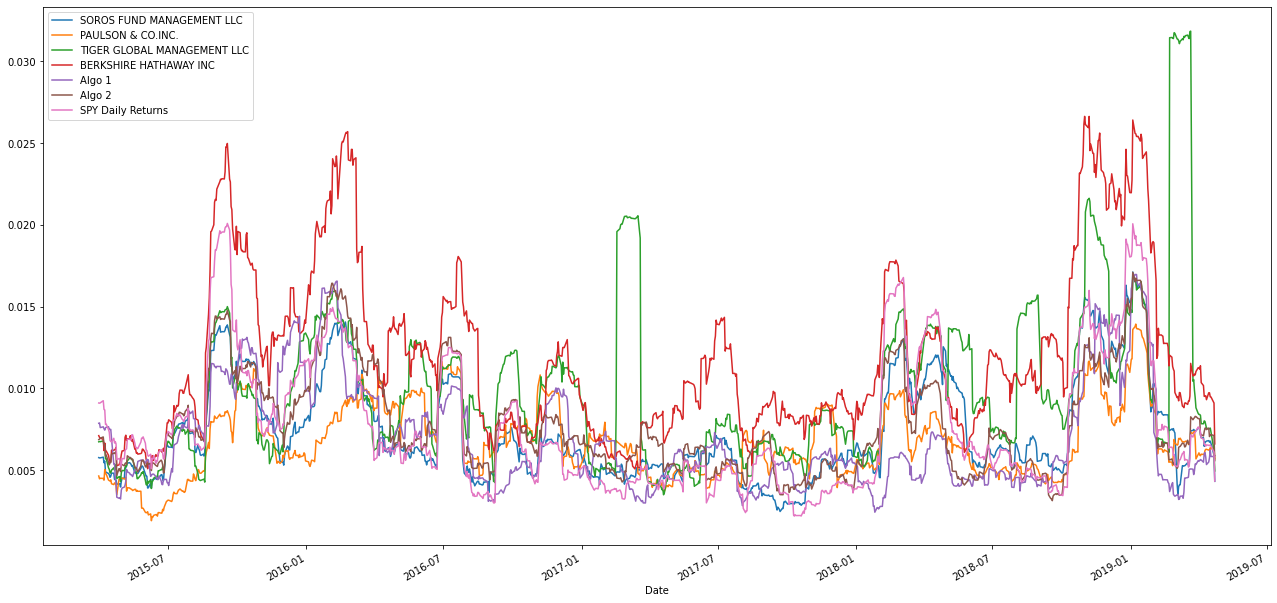

In [36]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_returns_std_21 = combined_returns.rolling(window=21).std()
# Plot the rolling standard deviation
combined_returns_std_21.plot(figsize=(22,11))

### Calculate and plot the correlation

In [37]:
# Calculate the correlation
combined_returns_corr = combined_returns.corr()

# Display the correlation matrix
combined_returns_corr

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SPY Daily Returns
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
SPY Daily Returns,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


<AxesSubplot:>

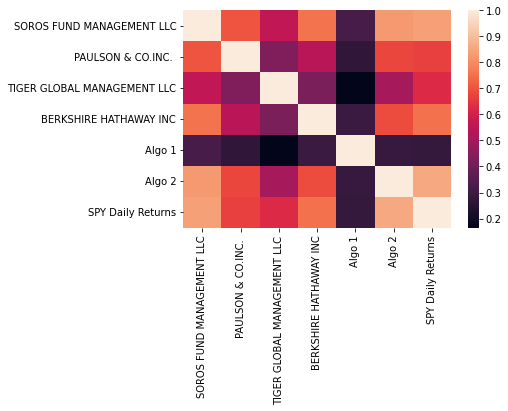

In [38]:
# Display the correlation matrix with heatmap
sns.heatmap(combined_returns_corr)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [39]:
portfolio_list = list(combined_returns_std.index)
portfolio_list

['SOROS FUND MANAGEMENT LLC',
 'PAULSON & CO.INC. ',
 'TIGER GLOBAL MANAGEMENT LLC',
 'BERKSHIRE HATHAWAY INC',
 'Algo 1',
 'Algo 2',
 'SPY Daily Returns']

<AxesSubplot:title={'center':'Portfolio Betas'}, xlabel='Portfolios', ylabel='Betas'>

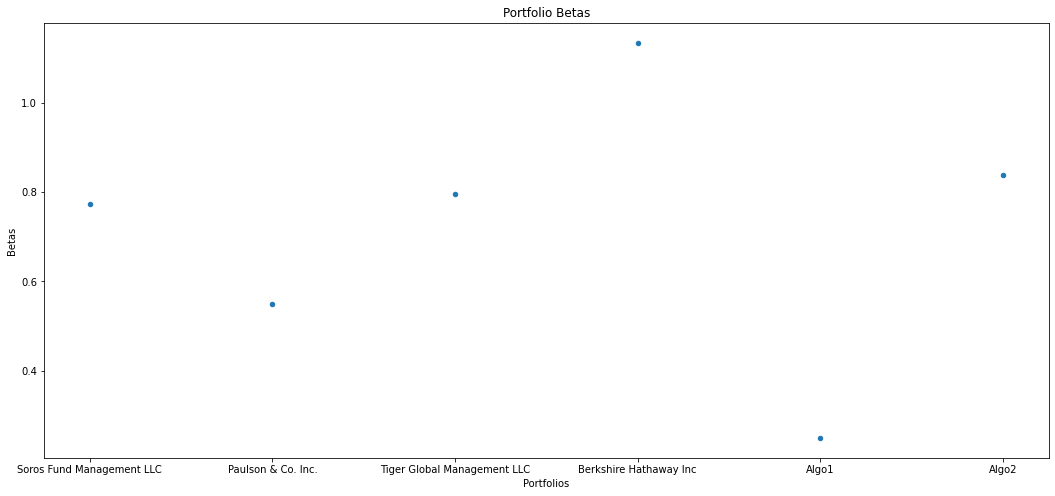

In [68]:
# Calculate covariance of a single portfolio

soros_covariance = combined_returns['SOROS FUND MANAGEMENT LLC'].cov(combined_returns['SPY Daily Returns'])
paulson_covariance = combined_returns['PAULSON & CO.INC. '].cov(combined_returns['SPY Daily Returns'])
tiger_covariance = combined_returns['TIGER GLOBAL MANAGEMENT LLC'].cov(combined_returns['SPY Daily Returns'])
berkshire_covariance = combined_returns['BERKSHIRE HATHAWAY INC'].cov(combined_returns['SPY Daily Returns'])
algo1_covariance = combined_returns['Algo 1'].cov(combined_returns['SPY Daily Returns'])
algo2_covariance = combined_returns['Algo 2'].cov(combined_returns['SPY Daily Returns'])

# Calculate variance of S&P 500
spy_variance = combined_returns['SPY Daily Returns'].var()
# spy_variance

# Computing beta
soros_beta = soros_covariance / spy_variance
paulson_beta = paulson_covariance / spy_variance
tiger_beta = tiger_covariance / spy_variance
berkshire_beta = berkshire_covariance / spy_variance
algo1_beta = algo1_covariance / spy_variance
algo2_beta = algo2_covariance / spy_variance

# Plot beta trend
portfolio_betas = {'Portfolios':['Soros Fund Management LLC', 'Paulson & Co. Inc.', 'Tiger Global Management LLC', 'Berkshire Hathaway Inc', 'Algo1', 'Algo2'],'Betas':[soros_beta, paulson_beta, tiger_beta, berkshire_beta, algo1_beta, algo2_beta]}
betas = pd.DataFrame(portfolio_betas)
betas.plot(kind='scatter', x='Portfolios', y='Betas', title='Portfolio Betas', figsize=(18,8))


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [42]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [43]:
# Annualized Sharpe Ratios


In [44]:
# Visualize the sharpe ratios as a bar plot


### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [45]:
# Reading data from 1st stock


In [46]:
# Reading data from 2nd stock


In [47]:
# Reading data from 3rd stock


In [48]:
# Combine all stocks in a single DataFrame


In [49]:
# Reset Date index


In [50]:
# Reorganize portfolio data by having a column per symbol


In [51]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [52]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [53]:
# Join your returns DataFrame to the original returns DataFrame


In [54]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [55]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [56]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [57]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [58]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [59]:
# Calculate Annualized Sharpe Ratios


In [60]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!